In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [9]:
diabetes_data = pd.read_csv("./../dataset/diabetes_processed.csv", index_col=0)

In [10]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


In [12]:
FEATURES = list(diabetes_data.columns[:-1])
FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#### PCA

In [14]:
from sklearn.decomposition import PCA

def apply_pca(n):
    pca = PCA(n_components=n)
    x_new = pca.fit_transform(diabetes_data[FEATURES])
    
    return pca, pd.DataFrame(x_new)

In [15]:
pca_obj, _ = apply_pca(8)

In [16]:
print("Explained variance: ", pca_obj.explained_variance_ratio_)

Explained variance:  [0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


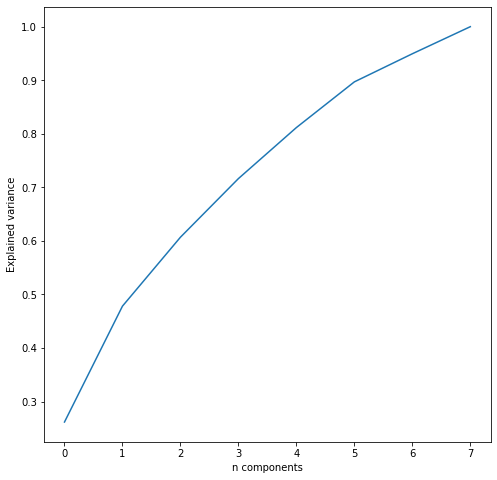

In [18]:
plt.figure(figsize=(8, 8))

plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))

plt.xlabel("n components")
plt.ylabel("Explained variance")
plt.show()

In [20]:
Y = diabetes_data["Outcome"]
_, X_new = apply_pca(5)

#### Train on the reduced X set

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.3)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [24]:
y_pred = model.predict(x_test)

#### Evaluation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("How many of the predicted labels were correct?")
print("Accuracy: ", model_accuracy)
print("")

print("How many of the positive predictions were correct?")
print("Precision: ", model_precision)
print("")

print("How many of the individuals with diabetes in the dataset were correclty classified?")
print("Recall: ", model_recall)

How many of the predicted labels were correct?
Accuracy:  0.7402597402597403

How many of the positive predictions were correct?
Precision:  0.7884615384615384

How many of the individuals with diabetes in the dataset were correclty classified?
Recall:  0.45555555555555555
